
#IMPORTING SOME LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Loading Data

In [ ]:
df = pd.read_csv("/content/Bank Data.csv",nrows=500)

In [ ]:
df.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0        Good           809.98                35.030402   
1                   4.0        Good           809.98                33.053114   
2                   4.0        Good           809.98                33.811894   
3                   4.0        Good           809.98                32.430559   
4                   5.0        Good           605.03                25.926822   

       Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0   22 Years and 9 Months                    No           49.574949   
1  22 Years and 10 Months                    No           49.574949   
2                     NaN                    No           49.574949   
3   23 Years and 0 Months                    No           49.574949   
4   27 Years and 3 Months                    No           18.816215   

   Amount_invested_monthly                 Payment_Behaviour Monthly_Balance  
0       236.64268203272135    Low_spent_Small_value_payments      186.266702  
1       21.465380264657146  High_spent_Medium_value_payments      361.444004  
2       148.23393788500925   Low_spent_Medium_value_payments      264.675446  
3        39.08251089460281  High_spent_Medium_value_payments      343.826873  
4       39.684018417945296   High_spent_Large_value_payments      485.298434  

[5 rows x 27 columns]

In [ ]:
df.shape

(500, 27)

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        500 non-null    object 
 1   Customer_ID               500 non-null    object 
 2   Month                     500 non-null    object 
 3   Name                      451 non-null    object 
 4   Age                       500 non-null    object 
 5   SSN                       500 non-null    object 
 6   Occupation                500 non-null    object 
 7   Annual_Income             500 non-null    object 
 8   Monthly_Inhand_Salary     424 non-null    float64
 9   Num_Bank_Accounts         500 non-null    int64  
 10  Num_Credit_Card           500 non-null    int64  
 11  Interest_Rate             500 non-null    int64  
 12  Num_of_Loan               500 non-null    object 
 13  Type_of_Loan              416 non-null    object 
 14  Delay_from

In [ ]:
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count             424.000000         500.000000        500.00000   
mean             4292.838339          16.860000         21.37200   
std              3037.209059         105.178064        129.48355   
min               519.128750           0.000000          1.00000   
25%              1828.240000           3.000000          4.00000   
50%              3047.676667           6.000000          5.00000   
75%              5988.705000           8.000000          7.00000   
max             12432.610000        1444.000000       1354.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count     500.000000           500.000000            492.000000   
mean       70.850000            21.510000             40.997967   
std       483.597084            16.351779            236.126933   
min         1.000000            -2.000000              0.000000   
25%         7.000000             9.000000              4.000000   
50%        13.000000            17.000000              7.000000   
75%        20.000000            29.000000             10.000000   
max      5455.000000            64.000000           2022.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  Monthly_Balance  
count                500.000000           500.000000       495.000000  
mean                  32.112533           835.404914       407.375081  
std                    5.017394          6500.162710       210.592756  
min                   21.367496             0.000000        16.969920  
25%                   27.655390            29.045533       276.047027  
50%                   32.349232            69.602920       352.334641  
75%                   36.152990           189.426531       476.282496  
max                   43.826894         77521.000000      1246.417112

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()


ID                           0
Customer_ID                  0
Month                        0
Name                        49
Age                          0
SSN                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary       76
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Type_of_Loan                84
Delay_from_due_date          0
Num_of_Delayed_Payment      40
Changed_Credit_Limit         0
Num_Credit_Inquiries         8
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Credit_History_Age          39
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly     20
Payment_Behaviour            0
Monthly_Balance              5
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(["ID","Customer_ID","Name"], axis=1, inplace=True)

In [ ]:
df.shape

(252, 24)

#Convert text to numerical values

In [ ]:
import pandas as pd

# Convert categorical/text columns to numerical values
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical (text)
        df[col] = pd.factorize(df[col])[0]  # Convert to numerical values


#Data Visualization

<Axes: >

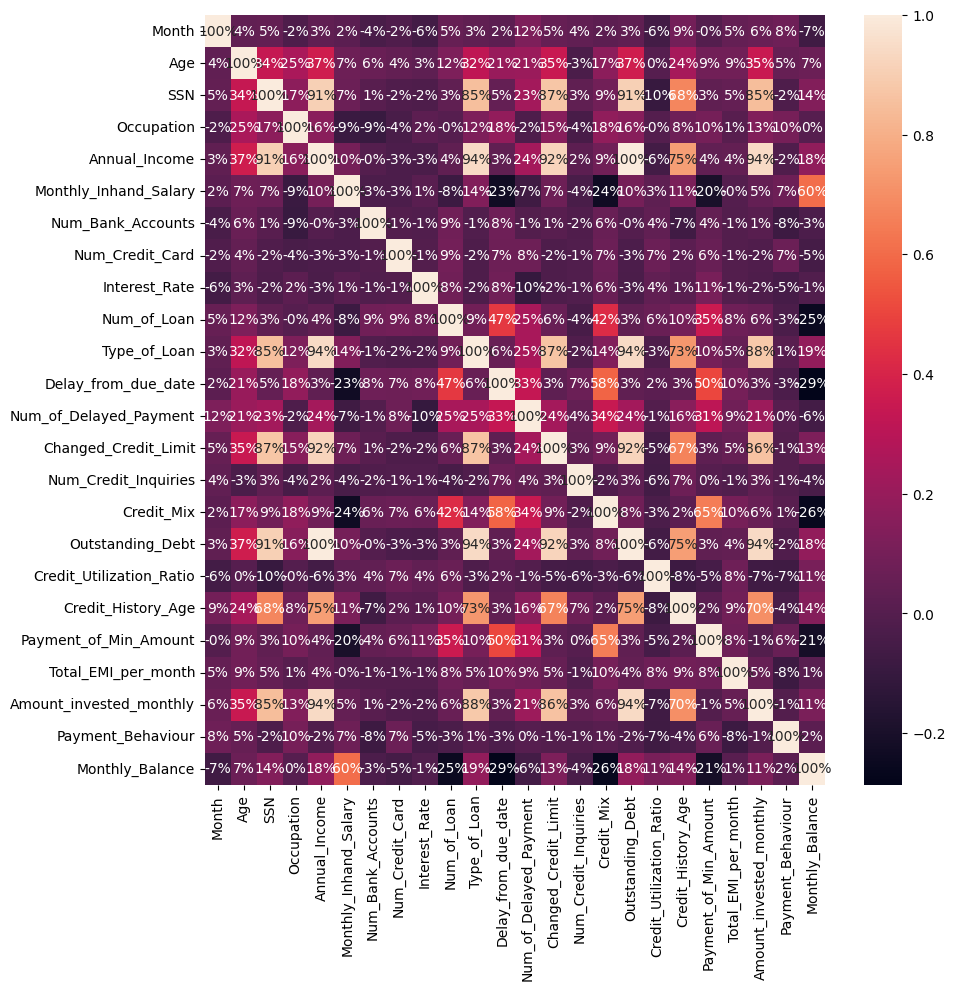

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

<Figure size 700x1000 with 0 Axes>

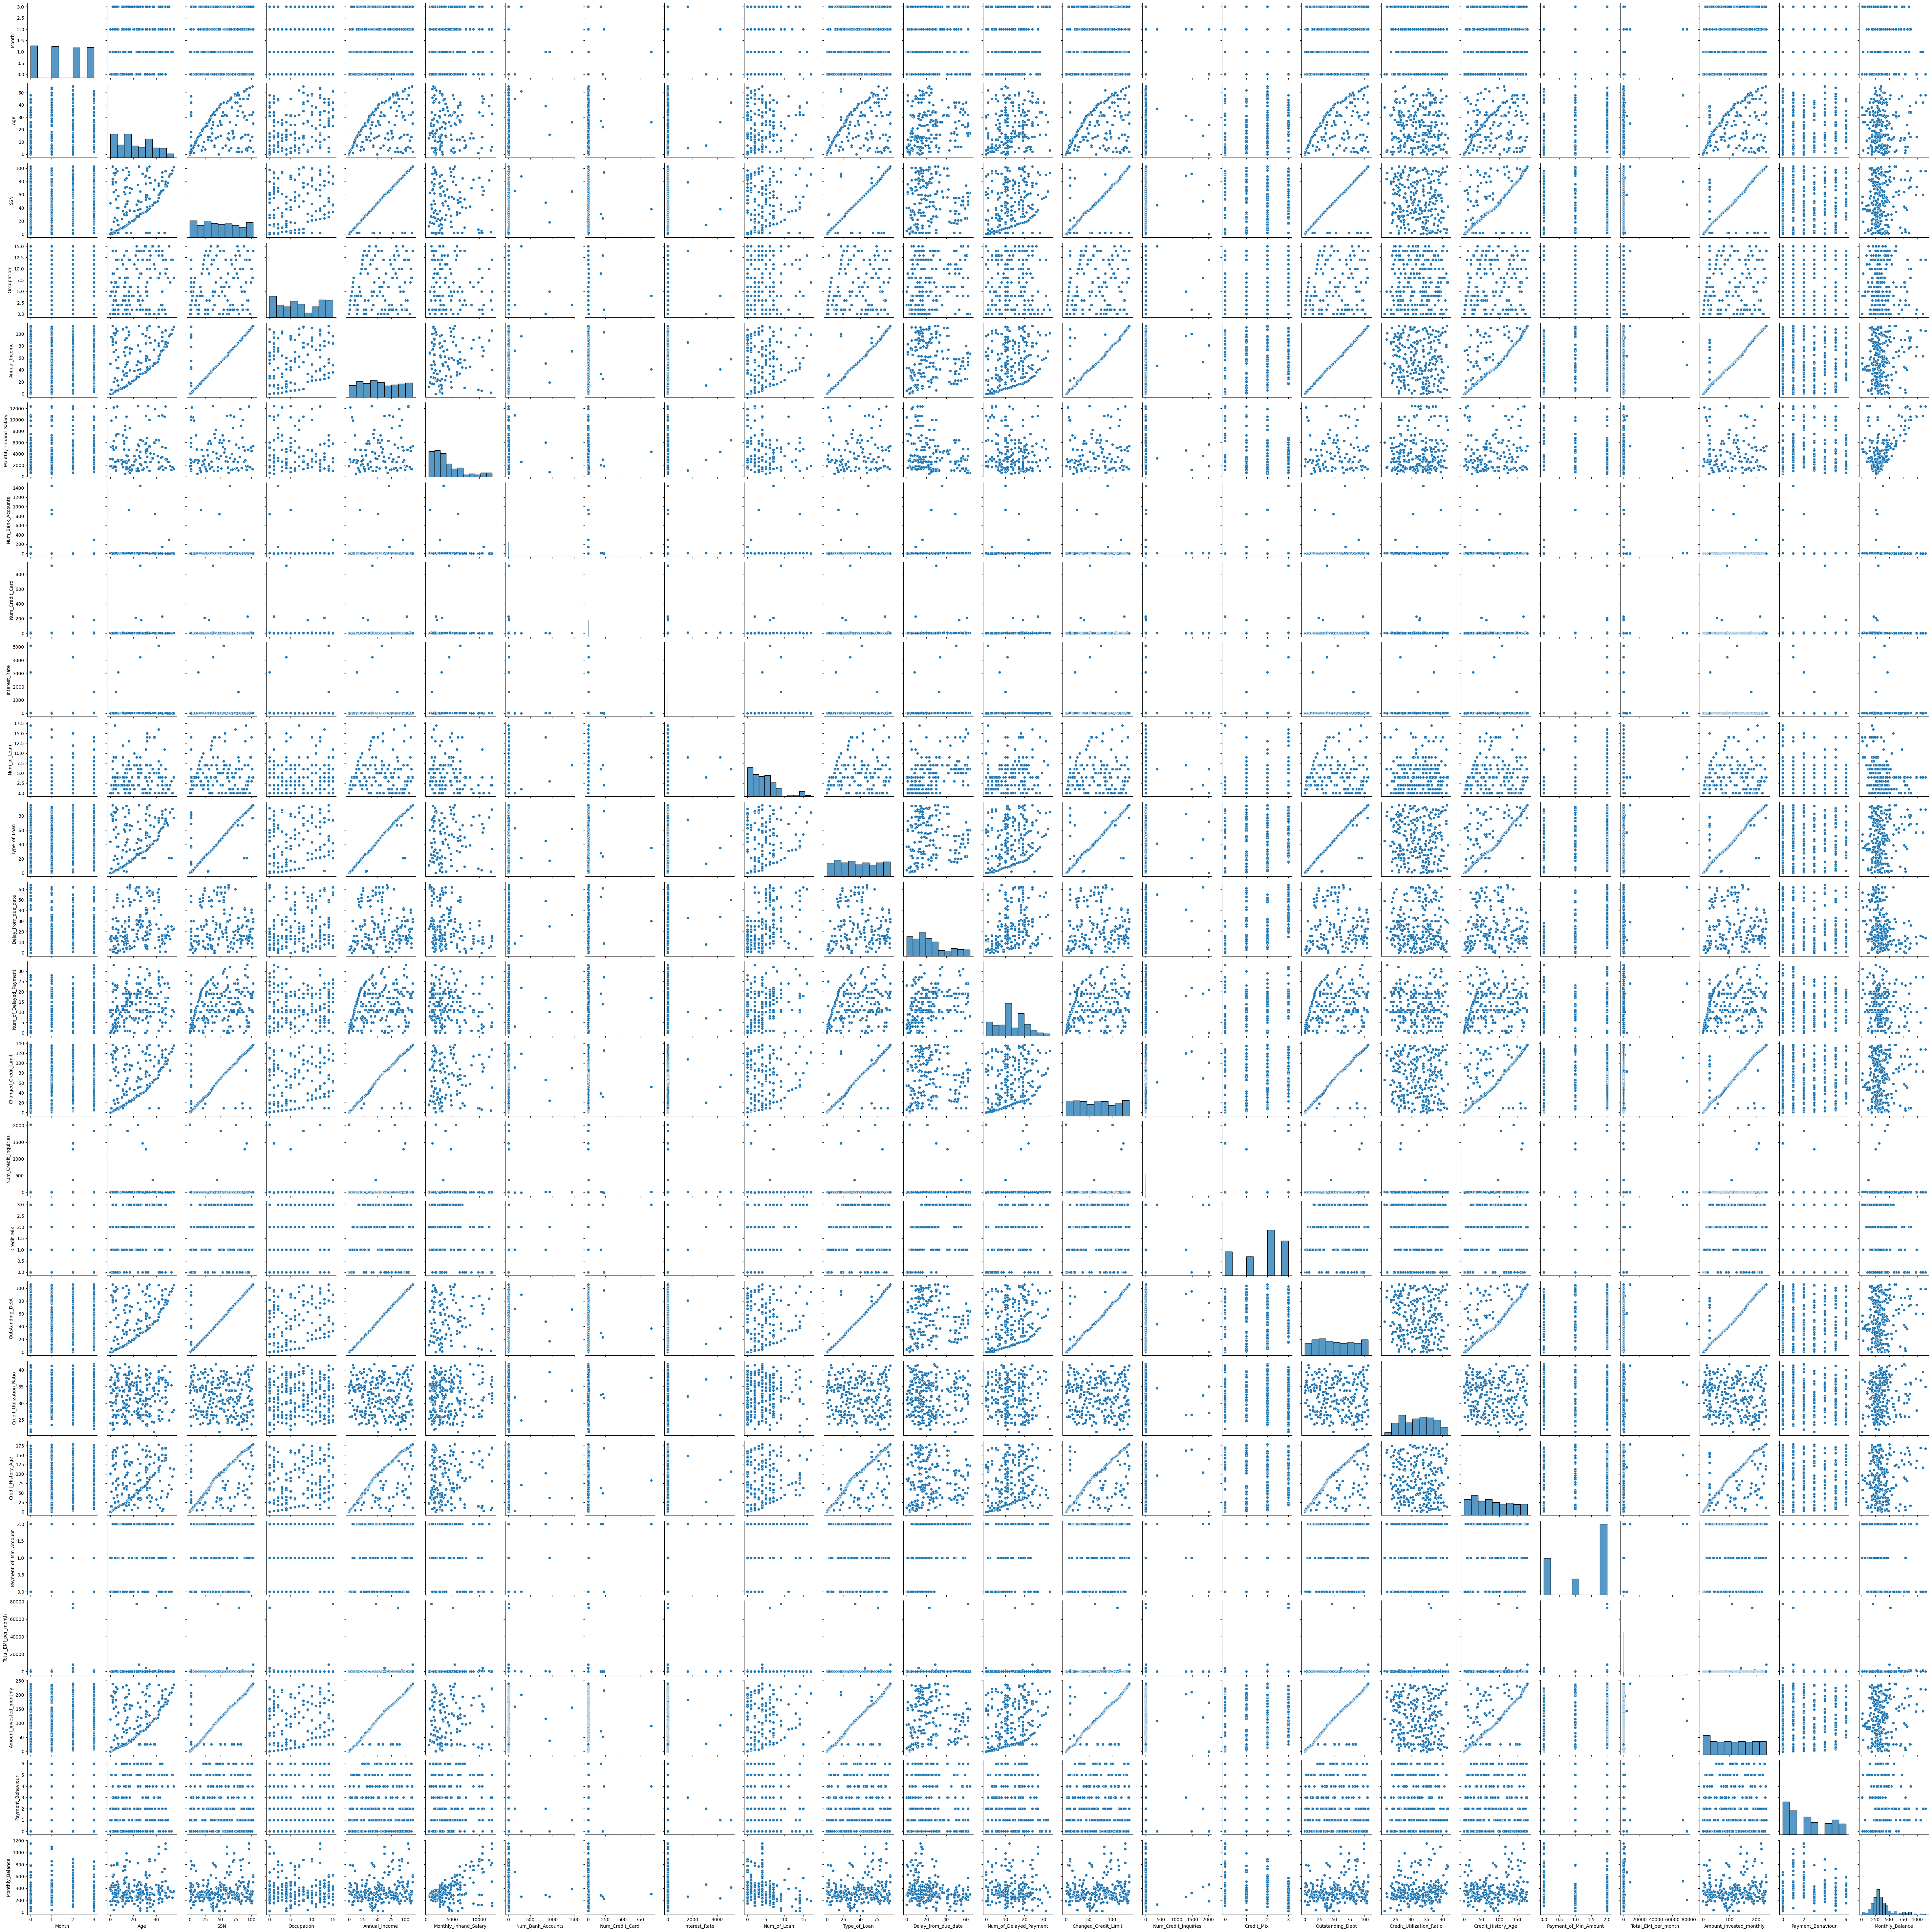

In [ ]:
fig = plt.figure(figsize=(7, 10))
sns.pairplot(df)

#Now working with two coloms for Clustering

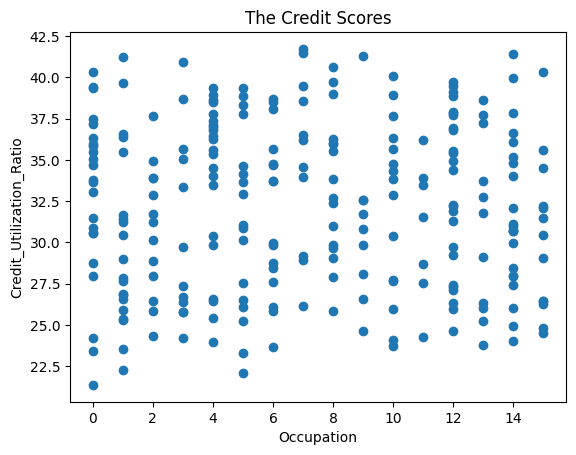

In [ ]:
plt.scatter(df['Occupation'],df['Credit_Utilization_Ratio'])

plt.xlabel('Occupation')
plt.ylabel('Credit_Utilization_Ratio')
plt.title('The Credit Scores')
plt.show()


#Optimiazing KMeans

In [ ]:
wcss = []
cluster = range(1,11)
for k in cluster:
  chappie = KMeans(n_clusters=k)
  chappie.fit(df[['Occupation','Credit_Utilization_Ratio']])
  wcss.append(chappie.inertia_)
print(wcss)

[12179.381598912933, 7626.332000549419, 4483.291639796953, 2898.8636933551566, 2531.5686959711525, 2086.422820873537, 1728.3399669702667, 1501.6093648494953, 1263.2658470455485, 1142.0520059361802]


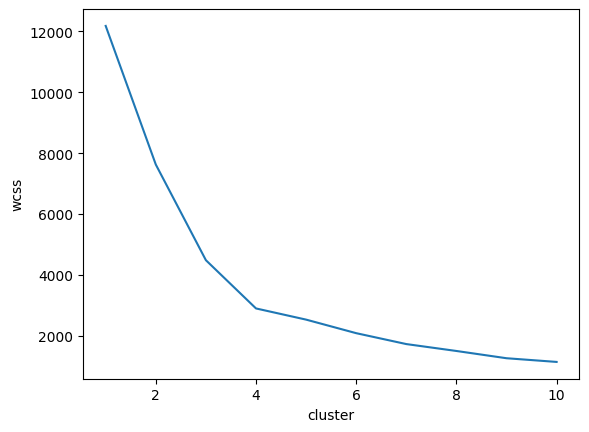

In [ ]:
plt.plot(cluster,wcss)

plt.xlabel('cluster')
plt.ylabel('wcss')
plt.show()




In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kn = KneeLocator(cluster,wcss,direction = 'decreasing',curve='convex')

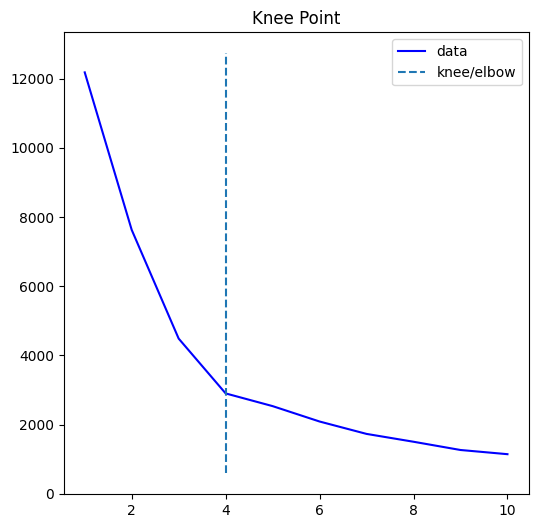

In [ ]:
kn.plot_knee()

In [ ]:
kn.knee

4

Train Optimizing KMeans Clustering number

In [ ]:
chappie = KMeans(n_clusters=4)


In [ ]:
chappie.fit(df[['Occupation','Credit_Utilization_Ratio']])

KMeans(n_clusters=4)

In [ ]:
df['cluster']=chappie.predict(df[['Occupation','Credit_Utilization_Ratio']])

In [ ]:
df.head()

Month  Age  SSN  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      0    0    0           0              0            1824.843333   
1      1    1    0           0              0            1824.843333   
4      0    2    1           1              1            3037.986667   
5      1    2    2           2              1            3037.986667   
7      2    2    1           2              1            3037.986667   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
0                  3                4              3            0  ...   
1                  3                4              3            0  ...   
4                  2                4              6            1  ...   
5                  2                4              6            1  ...   
7                  2                4              6            1  ...   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0           0                 0                 35.030402                   0   
1           0                 0                 33.053114                   1   
4           0                 1                 25.926822                   2   
5           0                 1                 30.116600                   3   
7           1                 1                 33.875167                   4   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                      0            49.574949                        0   
1                      0            49.574949                        1   
4                      0            18.816215                        2   
5                      0            18.816215                        3   
7                      0            18.816215                        4   

   Payment_Behaviour  Monthly_Balance  cluster  
0                  0       186.266702        3  
1                  1       361.444004        3  
4                  2       485.298434        1  
5                  3       303.355083        1  
7                  4       421.447964        3  

[5 rows x 25 columns]

In [ ]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
df3 = df[df['cluster']==3]
df4 = df[df['cluster']==4]




In [ ]:
centers = chappie.cluster_centers_
centers

array([[11.25925926, 36.4350723 ],
       [ 2.92307692, 27.43623042],
       [12.09375   , 28.30053465],
       [ 3.44927536, 36.53480364]])

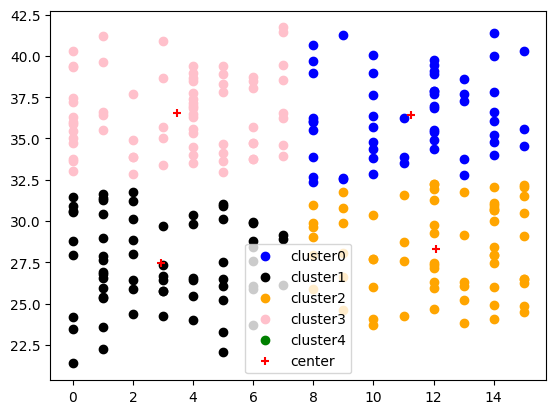

In [ ]:
plt.scatter(df0['Occupation'],df0['Credit_Utilization_Ratio'],color='blue',label = 'cluster0')
plt.scatter(df1['Occupation'],df1['Credit_Utilization_Ratio'],color='black',label = 'cluster1')
plt.scatter(df2['Occupation'],df2['Credit_Utilization_Ratio'],color='orange',label = 'cluster2')
plt.scatter(df3['Occupation'],df3['Credit_Utilization_Ratio'],color='pink',label = 'cluster3')
plt.scatter(df4['Occupation'],df4['Credit_Utilization_Ratio'],color='green',label = 'cluster4')




plt.scatter(centers[:,0],centers[:,1],color = 'red',label='center',marker='+')
plt.legend()

In [ ]:
df.head()

Month  Age  SSN  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      0    0    0           0              0            1824.843333   
1      1    1    0           0              0            1824.843333   
4      0    2    1           1              1            3037.986667   
5      1    2    2           2              1            3037.986667   
7      2    2    1           2              1            3037.986667   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
0                  3                4              3            0  ...   
1                  3                4              3            0  ...   
4                  2                4              6            1  ...   
5                  2                4              6            1  ...   
7                  2                4              6            1  ...   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0           0                 0                 35.030402                   0   
1           0                 0                 33.053114                   1   
4           0                 1                 25.926822                   2   
5           0                 1                 30.116600                   3   
7           1                 1                 33.875167                   4   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                      0            49.574949                        0   
1                      0            49.574949                        1   
4                      0            18.816215                        2   
5                      0            18.816215                        3   
7                      0            18.816215                        4   

   Payment_Behaviour  Monthly_Balance  cluster  
0                  0       186.266702        3  
1                  1       361.444004        3  
4                  2       485.298434        1  
5                  3       303.355083        1  
7                  4       421.447964        3  

[5 rows x 25 columns]

Now data is ready for classification

#Separate features and target coloms

In [ ]:
x = df.drop(['cluster'],axis=1)
y = df['cluster']

#Split train and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x.shape,x_train.shape,x_test.shape

((252, 24), (201, 24), (51, 24))

#Scaling the data

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_scaler_frame=pd.DataFrame(x_train,columns=x.columns)
x_scaler_frame.head()

Month       Age       SSN  Occupation  Annual_Income  \
0  1.348481  1.385150  0.141577   -1.292742       0.034895   
1  1.348481 -0.015329 -0.870081    1.162450      -0.971442   
2 -0.458484 -1.415807  1.087966   -0.474345       1.071727   
3  1.348481 -0.435472  1.283771    0.957850       1.254698   
4  0.444999  0.684911  0.272113   -0.065146       0.156875   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0               0.793956          -0.091214        -0.105403      -0.076159   
1              -0.341349          -0.069031        -0.076120      -0.092370   
2              -0.830997          -0.113397        -0.076120      -0.106265   
3              -0.375706          -0.080123        -0.105403      -0.076159   
4              -0.175257          -0.091214        -0.076120      -0.094686   

   Num_of_Loan  ...  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0     0.912269  ...             -0.155653   -0.745980          0.053734   
1     0.639808  ...             -0.155653   -0.745980         -0.974895   
2     0.367348  ...             -0.148300    1.164109          1.050219   
3     2.274573  ...             -0.140947    1.164109          1.275231   
4     0.639808  ...             -0.137271    1.164109          0.182313   

   Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                  1.642142            0.515130               0.770013   
1                  1.241005           -0.626938              -0.385007   
2                  0.512002            1.463627               0.770013   
3                  1.604384           -0.723724               0.770013   
4                  0.477657            0.631272               0.770013   

   Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0            -0.082672                 0.194269          -0.613111   
1            -0.106590                -0.889225          -0.613111   
2            -0.121000                 1.066692          -1.110027   
3            -0.119624                 1.235548          -0.613111   
4            -0.109727                 0.334982          -0.613111   

   Monthly_Balance  
0         0.404591  
1        -0.538539  
2        -0.879975  
3         0.168263  
4         0.031088  

[5 rows x 24 columns]

#now see before scaling and after scaling our data graph

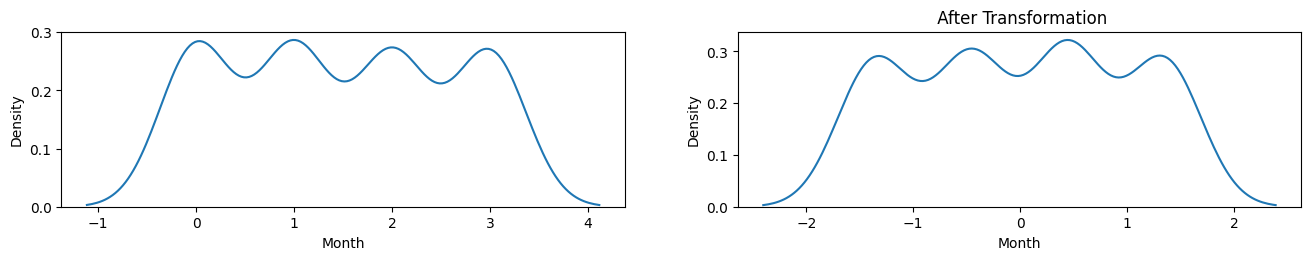

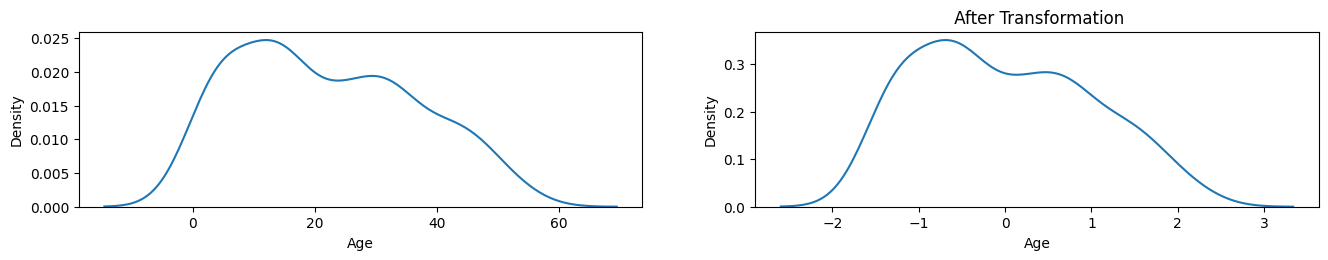

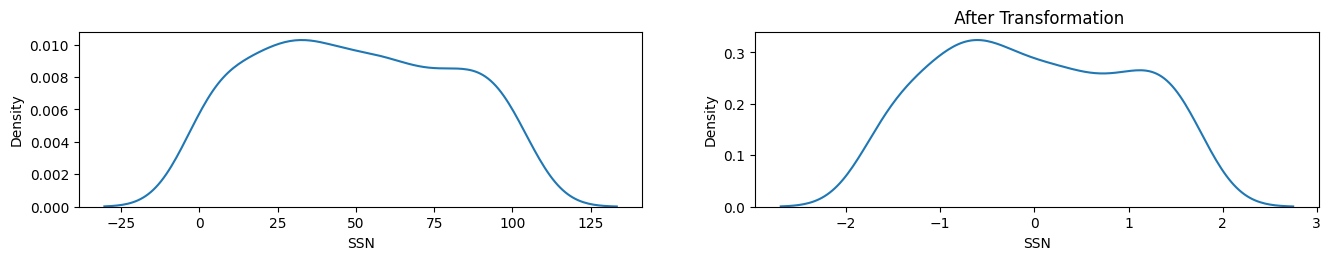

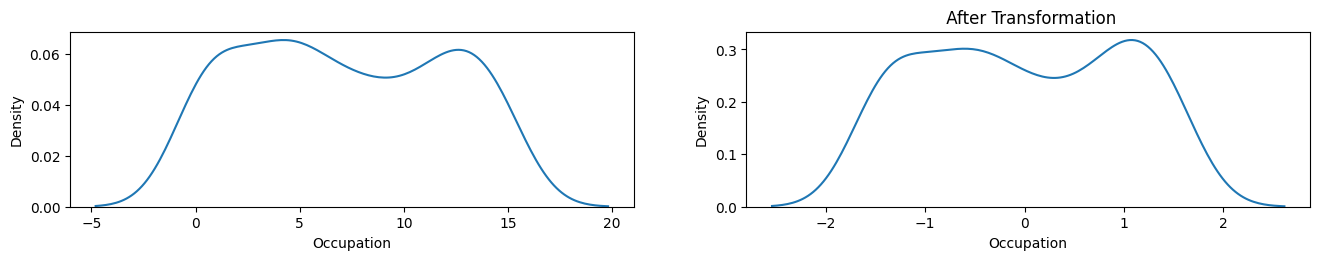

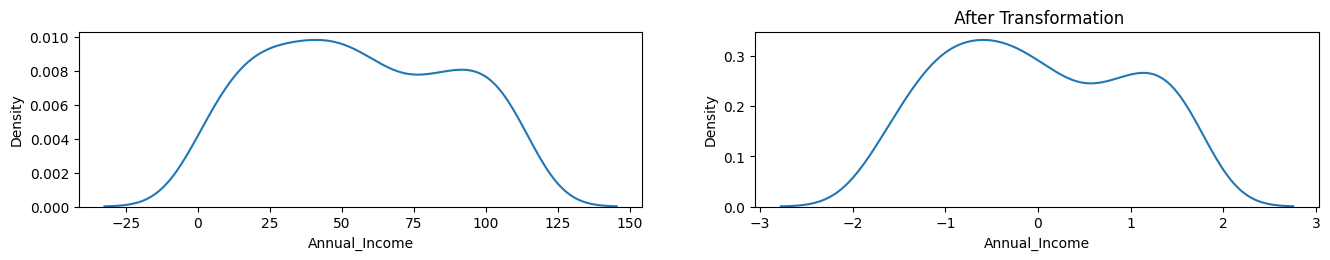

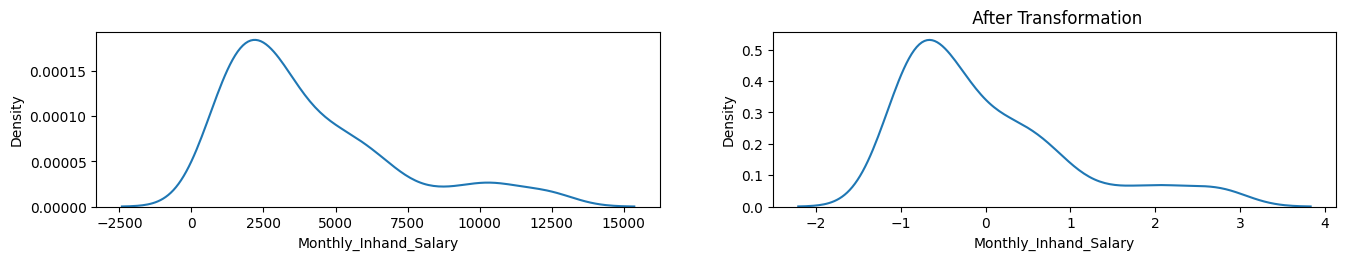

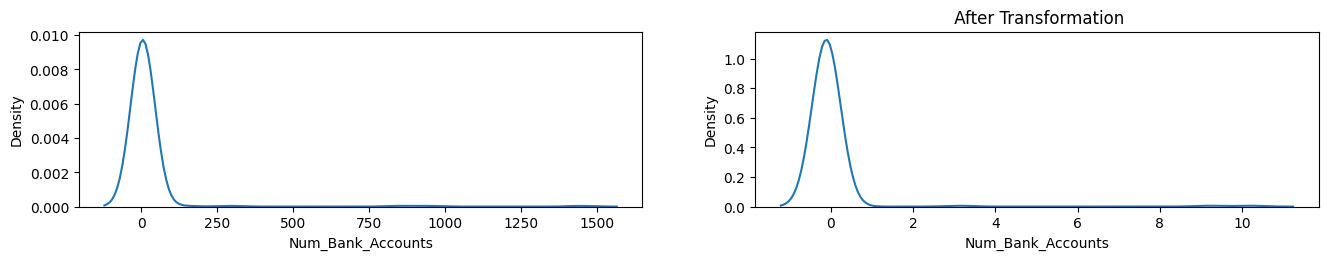

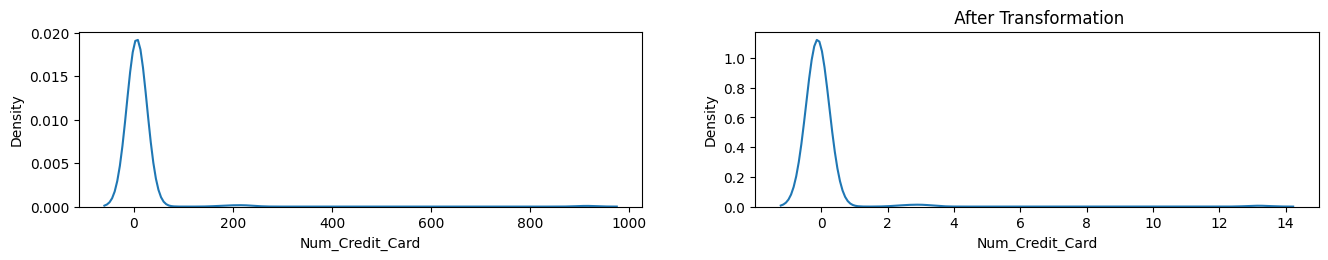

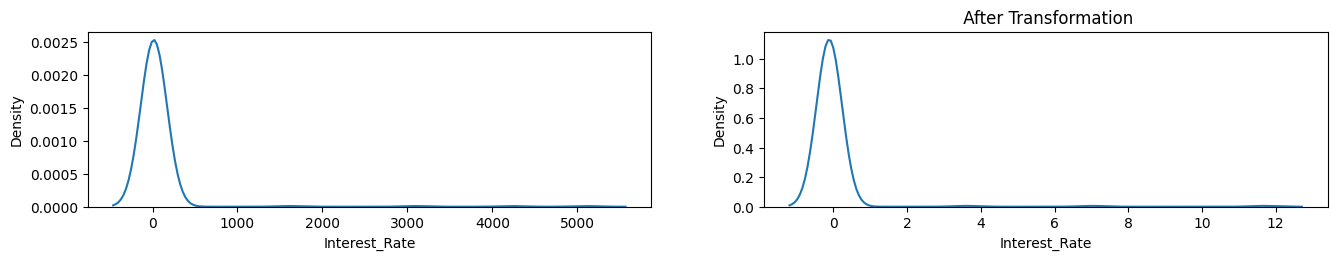

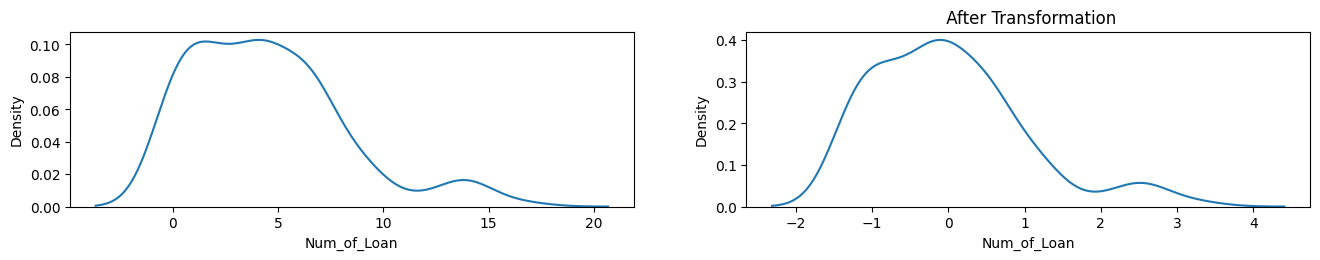

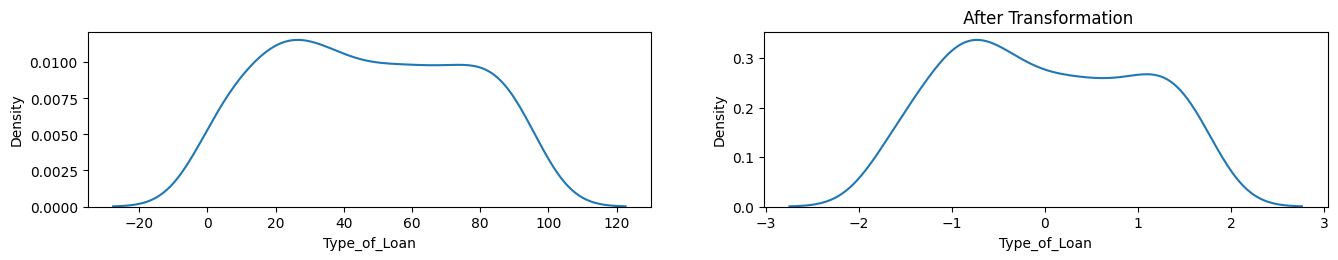

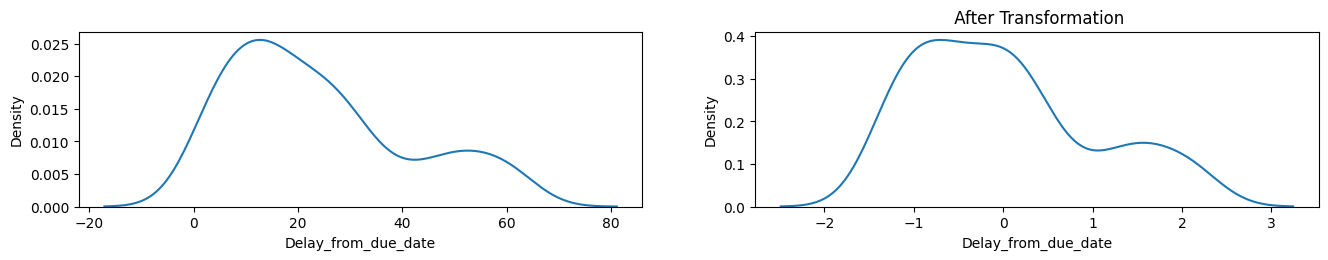

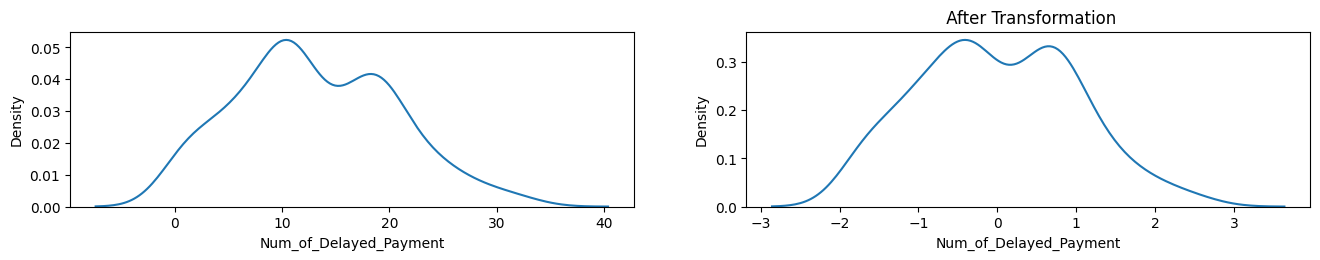

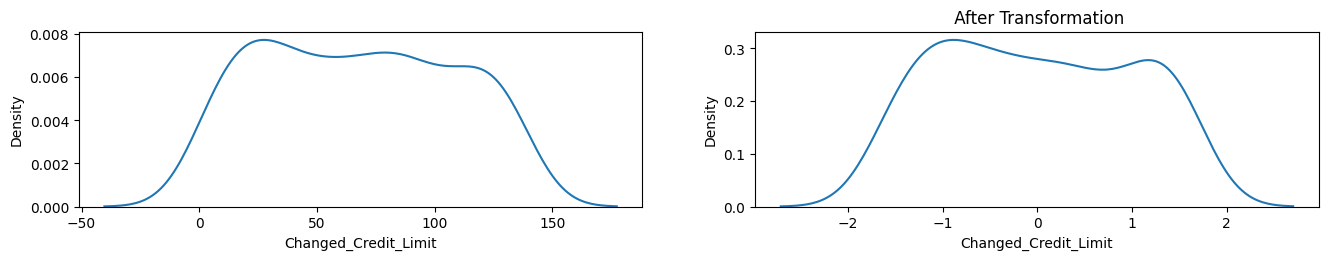

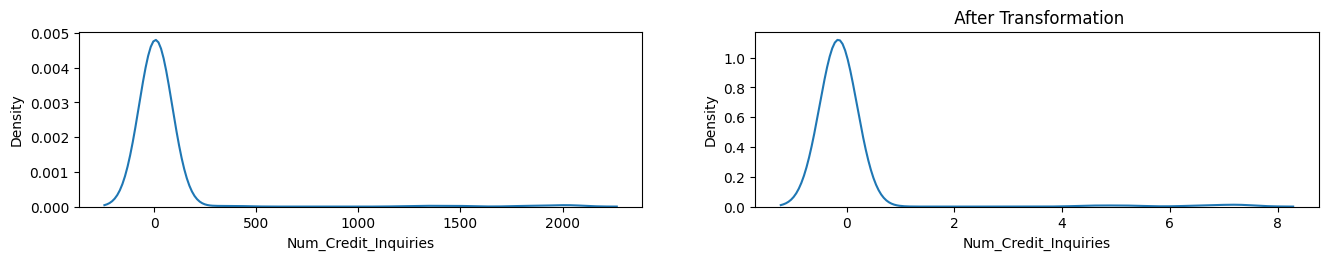

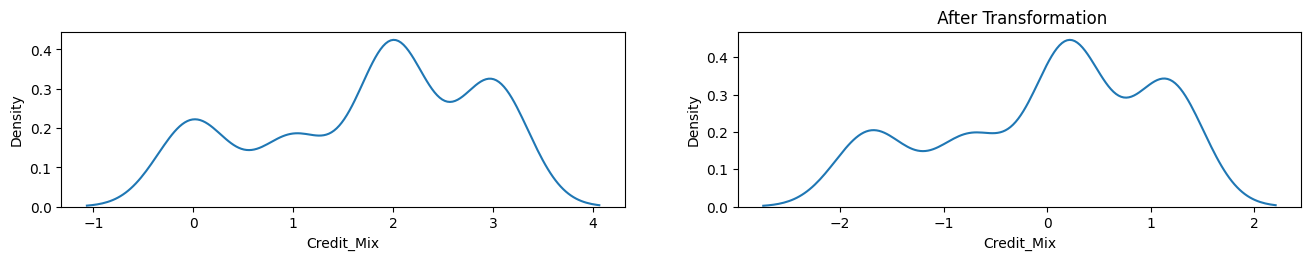

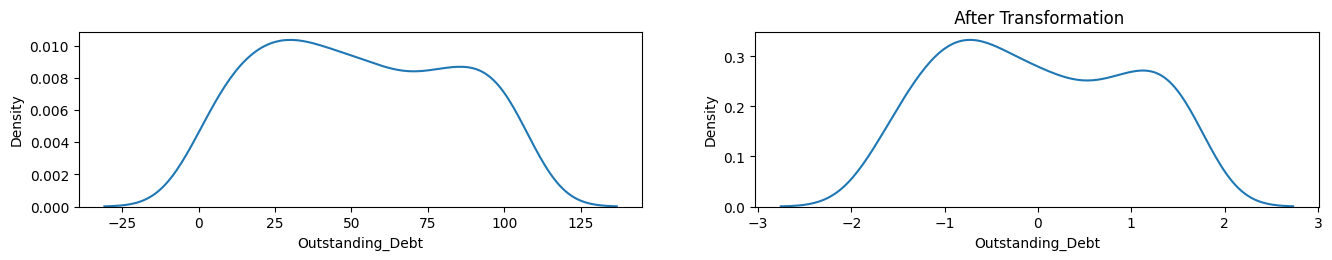

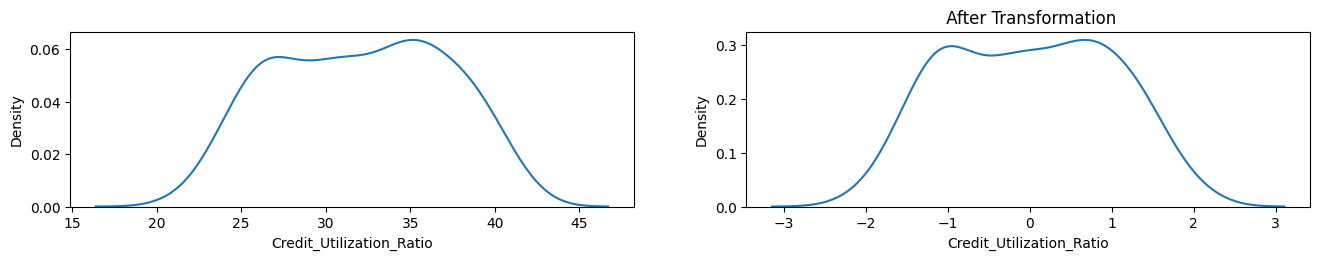

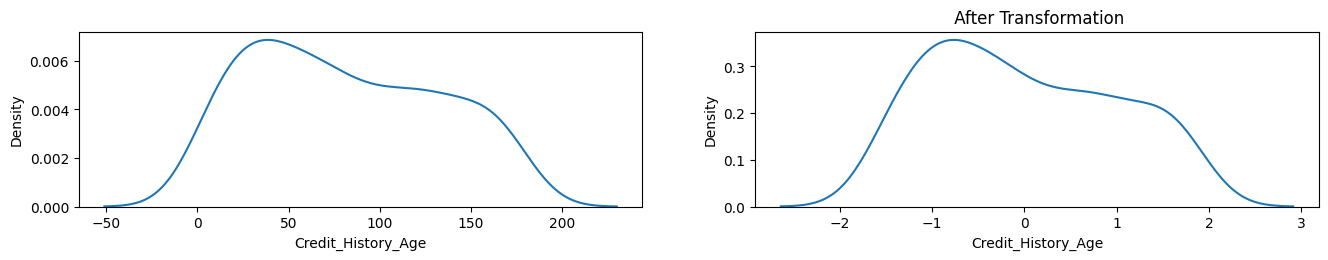

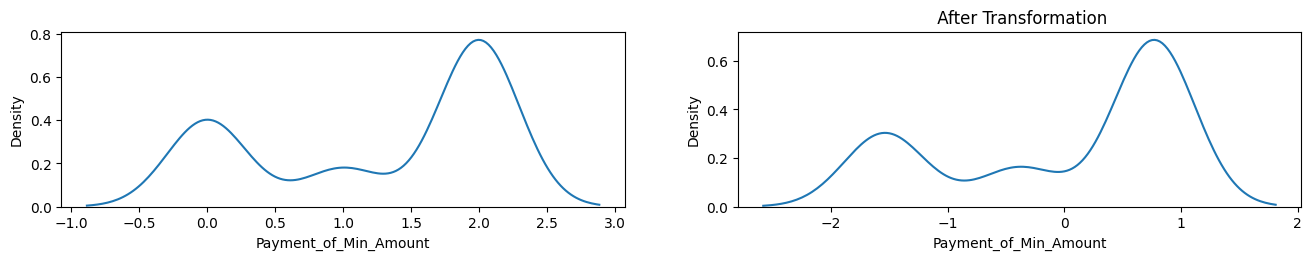

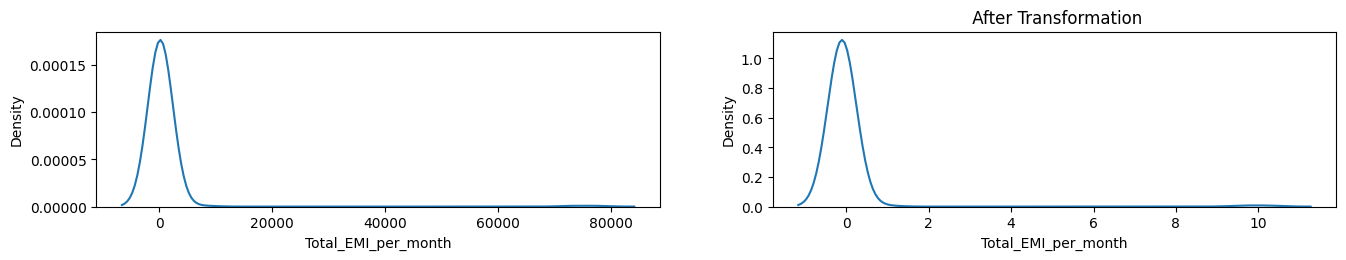

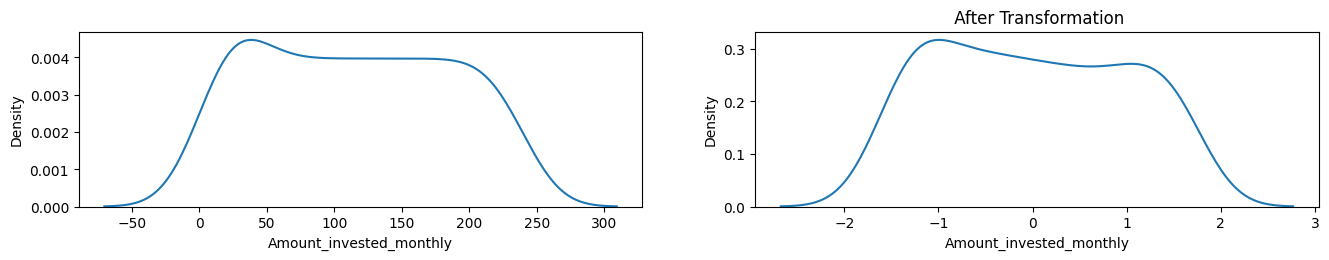

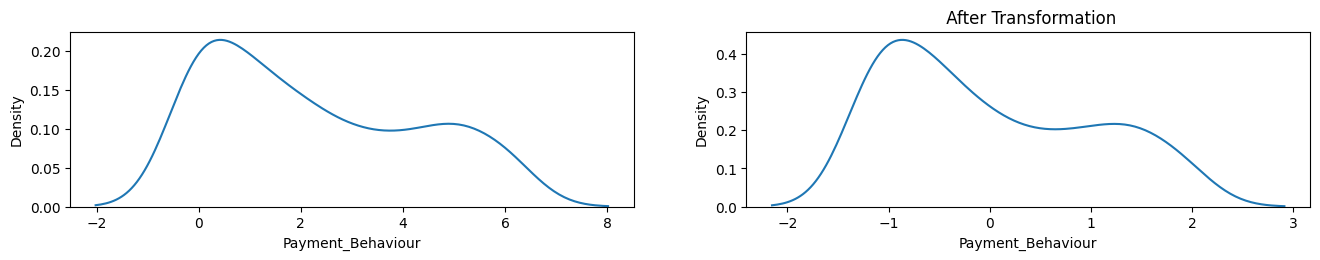

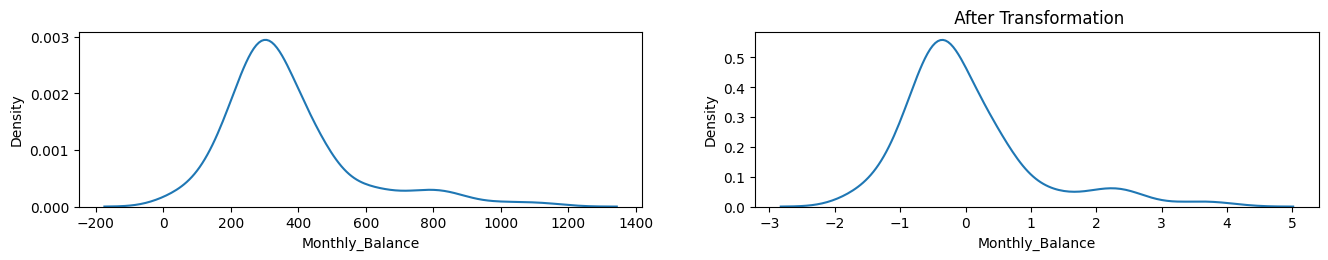

In [ ]:
for i in x.columns:
    plt.figure(figsize=(16,5))


    plt.subplot(2,2,3)
    sns.kdeplot(x=x[i])
    plt.subplot(2,2,4)
    sns.kdeplot(x=x_scaler_frame[i])
    plt.title(' After Transformation')

    plt.show( )

#Model Implementation

In [ ]:
!pip install xgboost


In [ ]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
adc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
classifiers = {

               'SVC' : svc,
               'KN' : knc,

               'DTC' : dtc,
               'LR' : lrc,
               'RF' : rfc,
               'AdaBoost' : adc,
               'BGC' : bc,
               'ETC' : etc,
               'GBDT' : gbdt,
               'XGB' : xgb


}

#Model Training

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test data

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix  # Return all values properly

# Dictionary to store results
results = {}

# Iterate over classifiers
for model_name, model_instance in classifiers.items():
    accuracy, precision, recall, f1, conf_matrix = evaluate_model(
        model_instance, x_train, y_train, x_test, y_test
    )

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

    # Print results
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")



Model: SVC
Accuracy: 0.6275
Precision: 0.6361
Recall: 0.6242
F1 Score: 0.6288
Confusion Matrix:
[[ 7  0  1  5]
 [ 1  8  1  2]
 [ 1  2  5  0]
 [ 3  3  0 12]]

Model: KN
Accuracy: 0.6275
Precision: 0.6306
Recall: 0.6485
F1 Score: 0.6270
Confusion Matrix:
[[ 7  0  4  2]
 [ 0  9  1  2]
 [ 1  1  6  0]
 [ 2  6  0 10]]

Model: DTC
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[13  0  0  0]
 [ 0 12  0  0]
 [ 0  0  8  0]
 [ 0  0  0 18]]

Model: LR
Accuracy: 0.9020
Precision: 0.9274
Recall: 0.9092
F1 Score: 0.9136
Confusion Matrix:
[[ 9  0  0  4]
 [ 0 12  0  0]
 [ 0  0  8  0]
 [ 1  0  0 17]]

Model: RF
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[13  0  0  0]
 [ 0 12  0  0]
 [ 0  0  8  0]
 [ 0  0  0 18]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: AdaBoost
Accuracy: 0.6078
Precision: 0.3048
Recall: 0.5000
F1 Score: 0.3787
Confusion Matrix:
[[13  0  0  0]
 [ 0  0  0 12]
 [ 8  0  0  0]
 [ 0  0  0 18]]

Model: BGC
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[13  0  0  0]
 [ 0 12  0  0]
 [ 0  0  8  0]
 [ 0  0  0 18]]

Model: ETC
Accuracy: 0.8824
Precision: 0.8787
Recall: 0.8921
F1 Score: 0.8818
Confusion Matrix:
[[11  0  2  0]
 [ 0 10  0  2]
 [ 0  0  8  0]
 [ 1  1  0 16]]

Model: GBDT
Accuracy: 0.9804
Precision: 0.9722
Recall: 0.9792
F1 Score: 0.9744
Confusion Matrix:
[[13  0  0  0]
 [ 0 11  1  0]
 [ 0  0  8  0]
 [ 0  0  0 18]]

Model: XGB
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[13  0  0  0]
 [ 0 12  0  0]
 [ 0  0  8  0]
 [ 0  0  0 18]]


#Model Evaluation

<Figure size 1200x600 with 0 Axes>

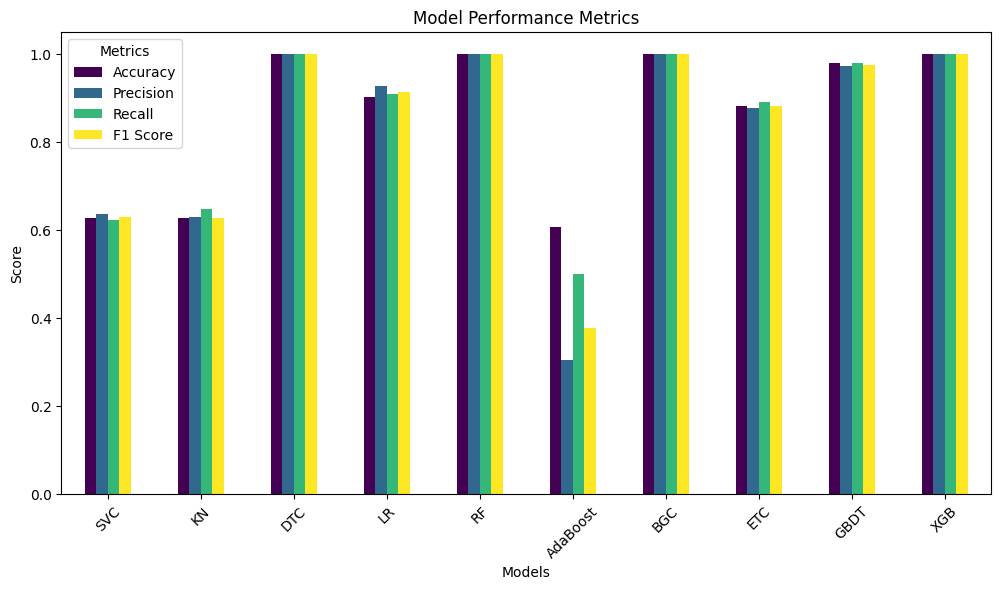

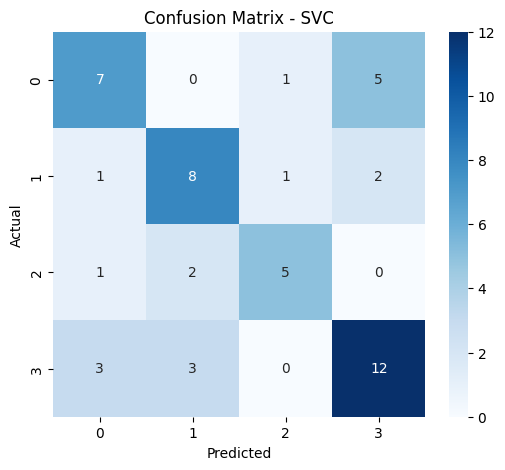

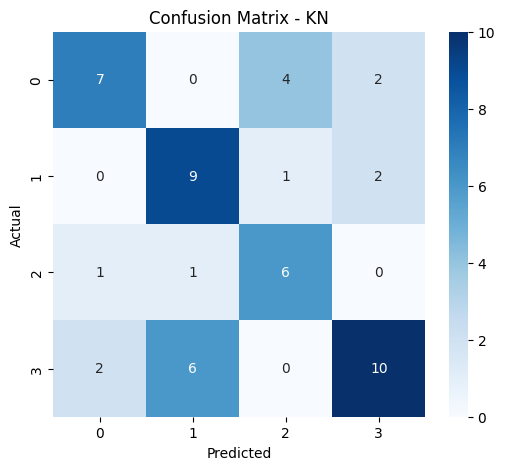

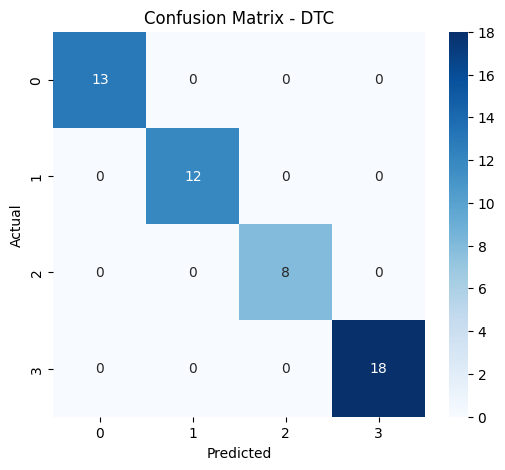

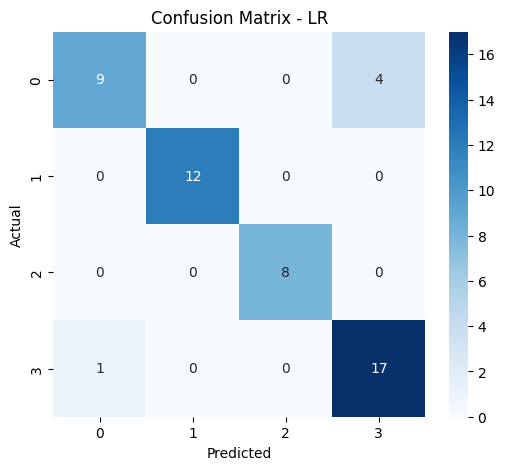

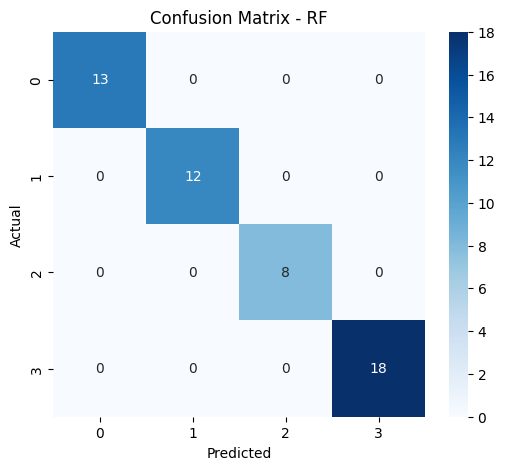

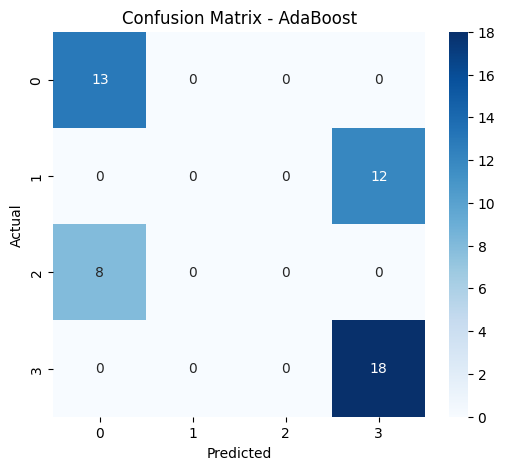

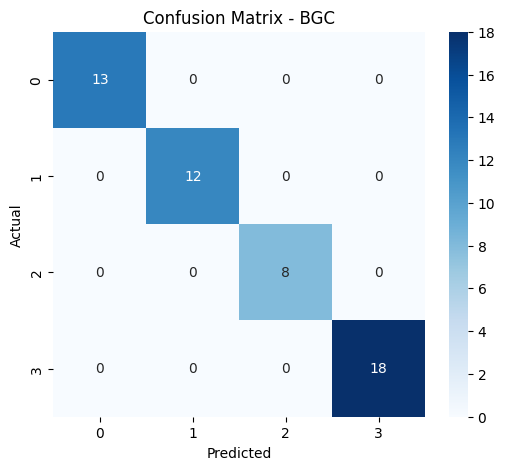

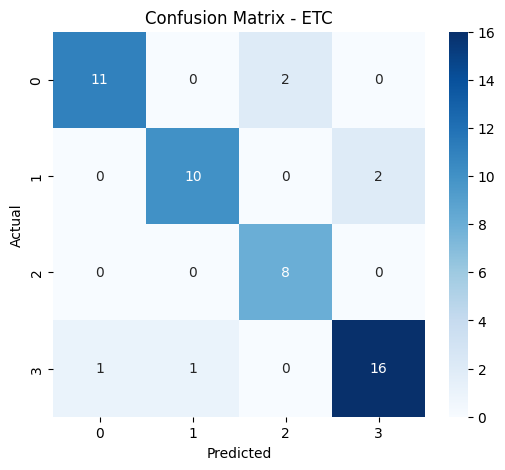

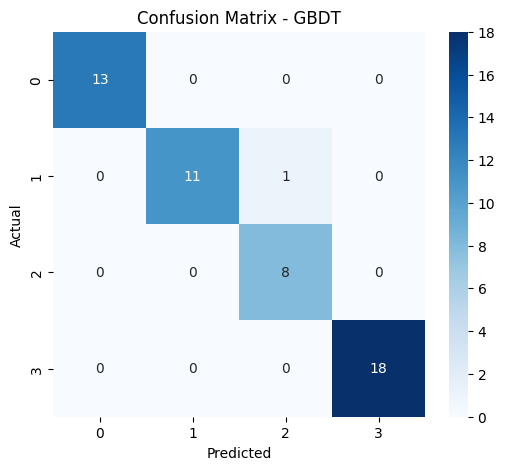

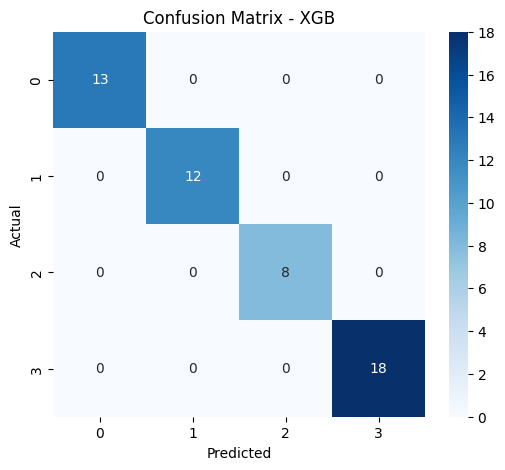

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
conf_matrices = results_df.pop("Confusion Matrix")  # Remove Confusion Matrix for separate handling

# Ensure numeric values for plotting
results_df = results_df.astype(float)

# Plot performance metrics
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.title("Model Performance Metrics")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

# --- CONFUSION MATRIX FOR EACH MODEL ---
def plot_confusion_matrix(conf_matrix, model_name, class_labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Get class labels dynamically from y_test
class_labels = np.unique(y_test)

# Loop through each model and plot its confusion matrix
for model_name, conf_matrix in conf_matrices.items():
    plot_confusion_matrix(conf_matrix, model_name, class_labels)


#Building a prediction system for evaluating

DTC got best performance

In [ ]:
model = DecisionTreeClassifier(max_depth=5) #DTC got best performance
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Keep only the first row of the DataFrame


input = x_train[:1, :]  # Keeps the first row


input


array([[ 1.34848145,  1.38515012,  0.14157685, -1.29274157,  0.03489486,
         0.79395626, -0.09121393, -0.10540253, -0.07615883,  0.91226923,
         0.17003777,  1.67193927,  2.19847035,  0.17854566, -0.15565302,
        -0.74598003,  0.05373436,  1.64214232,  0.51512963,  0.77001322,
        -0.08267232,  0.19426857, -0.61311056,  0.40459065]])

In [ ]:

predicted_class =model.predict(input)
print('predicted cluster label :',predicted_class)

predicted cluster label : [3]


#Hyperparameter optimization using Grid

Initialized Hyperparameters

In [ ]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28,30],
    'min_samples_split': [1,2,3,4,5,6,7,8],
    'min_samples_leaf': [1,2,3,4,5]
}

Perform Grid Search for Decision Tree

In [ ]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1100 fits failed out of a total of 8800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 15, 20, 25, 28,
                                       30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [ ]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00075336, 0.00051332, 0.00218973, ..., 0.00162177, 0.00216403,
        0.00164661]),
 'std_fit_time': array([4.06566903e-04, 3.69694896e-05, 1.85865632e-04, ...,
        3.13305600e-05, 1.65638981e-05, 4.39489197e-05]),
 'mean_score_time': array([0.        , 0.        , 0.00096445, ..., 0.00081596, 0.00084567,
        0.00082264]),
 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 7.93635825e-05, ...,
        1.56738049e-05, 2.33060716e-05, 1.15907726e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 5, 5,

In [ ]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000753      0.000407         0.000000        0.000000   
1       0.000513      0.000037         0.000000        0.000000   
2       0.002190      0.000186         0.000964        0.000079   
3       0.001646      0.000040         0.000850        0.000022   
4       0.002015      0.000018         0.000905        0.000133   

  param_criterion param_max_depth  param_min_samples_leaf  \
0            gini            None                       1   
1            gini            None                       1   
2            gini            None                       1   
3            gini            None                       1   
4            gini            None                       1   

   param_min_samples_split param_splitter  \
0                        1           best   
1                        1         random   
2                        2           best   
3                        2         random   
4                        3           best   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': None, 'min_...                NaN   
1  {'criterion': 'gini', 'max_depth': None, 'min_...                NaN   
2  {'criterion': 'gini', 'max_depth': None, 'min_...           0.975610   
3  {'criterion': 'gini', 'max_depth': None, 'min_...           0.878049   
4  {'criterion': 'gini', 'max_depth': None, 'min_...           0.975610   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2               1.00              1.000               1.00               1.00   
3               0.95              0.975               0.95               0.95   
4               1.00              1.000               1.00               1.00   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN             1541  
1              NaN             NaN             1541  
2         0.995122        0.009756                1  
3         0.940610        0.032745              787  
4         0.995122        0.009756                1

In [ ]:
tuning_result_dt_gs.shape

(1760, 18)

In [ ]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Evaluate the optimized DT model for Grid Search

In [ ]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(x_test)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        18

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



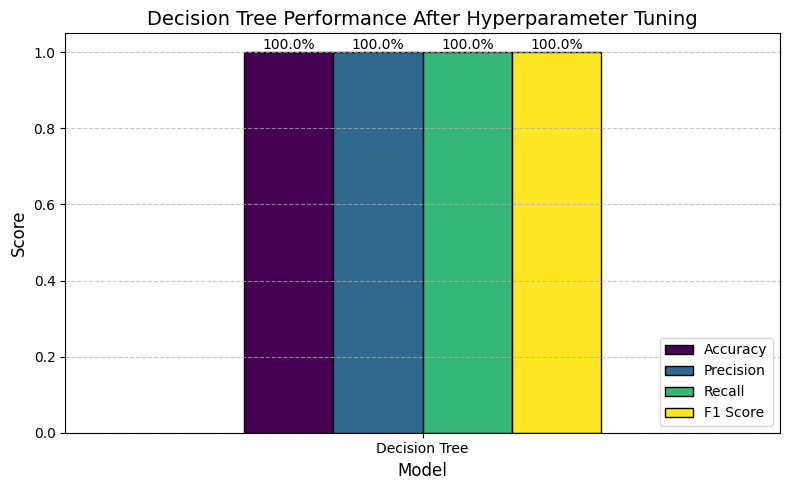

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics only for Decision Tree (Multiclass)
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_dt_gs),  # No need for 'average' in accuracy
    "Precision": precision_score(y_test, y_pred_dt_gs, average="weighted"),
    "Recall": recall_score(y_test, y_pred_dt_gs, average="weighted"),
    "F1 Score": f1_score(y_test, y_pred_dt_gs, average="weighted")
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(metrics, index=["Decision Tree"])

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
df_metrics.plot(kind="bar", colormap="viridis", edgecolor="black", ax=ax)

# Title and labels
plt.title("Decision Tree Performance After Hyperparameter Tuning", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Set grid, legend, and x-tick rotation
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show percentage values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#Saving the model

In [ ]:
import joblib as jb
jb.dump(dt_grid_search,'The Credit Score')
chappie =jb.load('The Credit Score')